# Assignment 3

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel→→Restart) and then run all cells (in the menubar, select Cell→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [130]:
NAME = "Zachary Schmitt"
STUDENT_ID = "1574482"

# 1) Binary Classification
## i) Logistic Regression
In this task, we will run logistic regression using scikit learn. But first the dataset needs to be created. Call this data set the Gaussian Quantile Dataset.

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_gaussian_quantiles
np.random.seed(111)

In [132]:
# Construct dataset
X, y = make_gaussian_quantiles(cov=4.,
                                 n_samples=500, n_features=1,
                                 n_classes=2, random_state=1)
# Making X1 values, reshape y1, and creating random noise for x1 values
X = X-3.0  
noise = np.random.normal(loc=0.0, scale=0.4, size=len(X)).reshape(-1,1)
y = y.reshape(-1,1)
X = np.sum([X,noise],axis=0)

In [133]:
# The dataset
print(np.concatenate((X,y), axis=1, out=None))

[[-2.42338811e+00  0.00000000e+00]
 [ 1.53512714e+00  1.00000000e+00]
 [-2.97599422e+00  0.00000000e+00]
 [ 4.78916909e-01  1.00000000e+00]
 [-1.60960529e+00  1.00000000e+00]
 [-3.55691511e+00  0.00000000e+00]
 [-3.86154330e+00  0.00000000e+00]
 [-3.07094921e+00  0.00000000e+00]
 [ 2.76750500e+00  1.00000000e+00]
 [-2.41581646e+00  0.00000000e+00]
 [-4.62707507e+00  1.00000000e+00]
 [-4.74476399e+00  1.00000000e+00]
 [-3.00505940e+00  0.00000000e+00]
 [ 5.43380441e-01  1.00000000e+00]
 [-5.55712418e+00  1.00000000e+00]
 [-1.41449115e+00  1.00000000e+00]
 [-2.27826391e+00  0.00000000e+00]
 [-1.94740223e+00  0.00000000e+00]
 [-2.46007512e+00  0.00000000e+00]
 [-3.76786255e+00  0.00000000e+00]
 [-7.59123156e-01  1.00000000e+00]
 [-3.92296941e+00  0.00000000e+00]
 [-1.40830029e+00  1.00000000e+00]
 [-3.51714486e+00  0.00000000e+00]
 [-6.91583977e-01  1.00000000e+00]
 [-3.25406548e+00  0.00000000e+00]
 [-4.70192512e+00  0.00000000e+00]
 [-2.88430556e+00  0.00000000e+00]
 [-3.82868876e+00  0

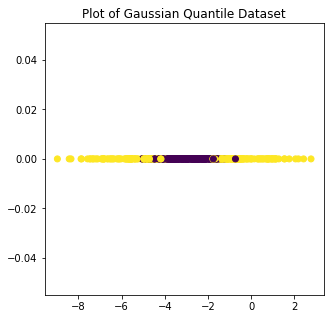

In [134]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], np.zeros(len(X)), c=y)

# plt.plot(x_test, clf.coef_ * x_test + clf.intercept_, linewidth=3)
plt.title('Plot of Gaussian Quantile Dataset')
plt.show()

Above is a plot of the dataset we created. Yellow dots are class 1 and purple dots are class 0.
### i.a.) Comment on how do you think logistic regression will perform when trying to classify this dataset.

#### YOUR ANSWER HERE
Logistic regression will not preform well on this dataset as there is no line that can divide the data into 2 sets. 

### i.b.) Implement Logistic Regression
Implement logistic regression using scikit learn on the dataset we created and train the model. You may refer to https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for more information on scikit learn logistic regression. \\
** Hint: look up in the documentation how you can adjust the penalty parameter to 'l2' or 'l1' regularization, the parameter C (the same as $\lambda$ in linear regression), or adjusting max_iter.

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [136]:
x_train, x_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=144) #YOUR CODE HERE use the sklearn train test split function to generate the training and test sets.
clf =  LogisticRegression(penalty='l2', tol=0.0001, C=10, max_iter=10000000, random_state=0).fit(x_train, y_train.ravel())# Call logistic regression form sklearn
print('Training Score: ', clf.score(x_train, y_train))
print('Testing Score: ', clf.score(x_test, y_test))

Training Score:  0.735
Testing Score:  0.68


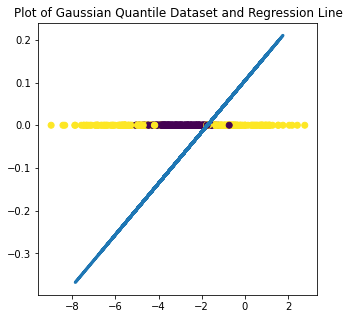

In [137]:
# Plot results
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], np.zeros(len(X)), c=y)

plt.plot(x_test, clf.coef_ * x_test + clf.intercept_, linewidth=3)
plt.title('Plot of Gaussian Quantile Dataset and Regression Line')
plt.show()


### i.c) How did we do?

Please comment on the performance of the model you trained on training and test sets. Did you try adjusting the parameters? If so, did they help?

#### YOUR ANSWER HERE
My model was not able to gain significant accuracy. I tried changing the parameters of the Logistic Regression function, and randomizing the data, however the highest accuracy I was able to achieve is 68% on the test data.

## ii) Polynomial Transformation + Sign Classification
Let's try some other models and see if they perform better. Recall from lecture the Binary "Sign" Classifier:
$$\begin{align}
f(x)= sign({\bf{\theta}}\cdot\phi(x))=\begin{cases} 
          1 & 0\leq {\bf{\theta}} \cdot\phi(x)  \\
          0 & {\bf{\theta}} \cdot\phi(x) < 0
            \end{cases}
\end{align}
$$
We will now use Binary Sign Classifier, along with polynomial and horizontal translation in order to learn out dataset. In the next couple of sections we will illustrate how to use polynomial and horizontal translation in order use the Sign Binary Classifier. \\
** Note that we will classify an example as 1 if $0\leq {\bf{\theta}} \cdot\phi(x)$

### Polynomial transformation example
Let us first generate an example dataset.

In [138]:
# Create example data
example_data = np.arange(-3,3,0.1).reshape(-1,1)
# We will create some example labels. y=1 if x<-1 and 1<x and 0 otherwise
example_y = np.array([1 if 1<x or x<-1 else 0 for x in example_data])

From the plot below, we can see that this second data set is much like the dataset in part i.

<function matplotlib.pyplot.show>

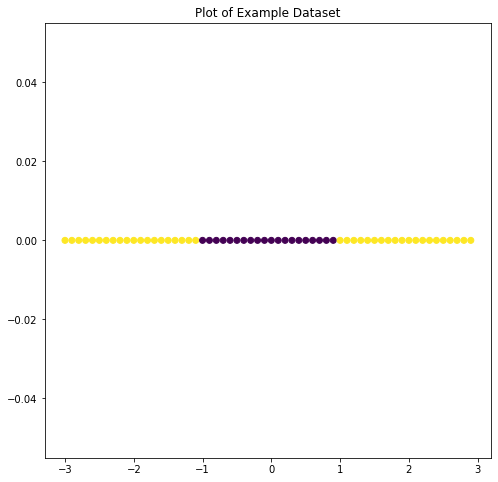

In [139]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8,8))
plt.scatter(np.arange(-3,3,0.1).reshape(-1,1),np.zeros(len(example_data)), c=example_y)
plt.title('Plot of Example Dataset')
plt.show

Next, we'll now begin implementing the polynomial transformation. We begin by using scikit learn to carry polynomial transform on an example dataset. We'll also define the score variable $\hat{y_i}={\bf{\theta}}\cdot\phi(x)$ as:

$$
\begin{align}
\hat{y_i}={\bf{\theta}}\cdot\phi(x_i) &= \theta_{0} + \theta_{1} \phi_1(x_i)+\theta_{2} \phi_2(x_i)+...+\theta_{d} \phi_d(x_i) \\
&=\theta_{0} + \theta_{1} x_i+\theta_{2} x_i^2+...+\theta_{d} x_i^d
\end{align}
$$
where $i$ is the sample number $\phi_j(x)=x^j$, where $j$ is a power, and ${\bf{\theta}}$ is a weight vector that is the length of $d$ (more on ${\bf{\theta}}$ later). To tie it all back together, the $i^{th}$ sample will be labelled as 1 if $0 \leq \hat{y}_i$ and 0 if $0>\hat{y}_i$.

\\

The first step will then be to compute the polynomial transform. Our data is in the form
$$X =
\begin{bmatrix}
    x_{1}\\
    x_{2}\\
    \vdots \\
    x_{n} 
\end{bmatrix}$$
Using second degree polynomials we transform it into:
$$X =\begin{bmatrix}
    1&x_{1} & x_{1}^2\\
    1&x_{2}& x_{2}^2\\
    \vdots & \vdots & \vdots \\
    1&x_{n}& x_{n}^2
\end{bmatrix}$$
More information here on scikit learn polynomial transformation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [140]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
poly = PolynomialFeatures(2) # We will use a polynomial of 2nd degree for this example.

In [141]:
# Next we fit the polynomial transform
example_X = poly.fit_transform(example_data)

Next, we compute the vector $\hat{y}=\phi(x) {\bf{\theta}}$ by multiplying the matrices $\phi(x)$ and ${\bf{\theta}}$. ${\bf{\theta}}$ is a weight vector that determines the value of the bias and the scale of the polynomial transformations. We will manually adjust these values to try to get a good fit using Binary Sign Classification model. The plus side of using ${\bf{\theta}}$ is that we can drop unwanted terms from prediction $h_i=sign(\hat{y}_i)$. For example we will implement computing the array of scores $\hat{y}$ as
$$
\begin{align}
\hat{y}=\phi(x) {\bf{\theta}}= \begin{bmatrix}
    1&x_{1} & x_{1}^2\\
    1&x_{2}& x_{2}^2\\
    \vdots & \vdots & \vdots \\
    1&x_{n}& x_{n}^2
\end{bmatrix}
\begin{bmatrix}
    0\\
    0\\
    1
\end{bmatrix}=\begin{bmatrix}
     x_{1}^2\\
     x_{2}^2\\
    \vdots\\
     x_{n}^2
\end{bmatrix}
\end{align}
$$

In [142]:
# We compute y_hat
theta = np.array([0,0,1])
y_hat = np.matmul(example_X,theta)

Now we'll plot our data 

<function matplotlib.pyplot.show>

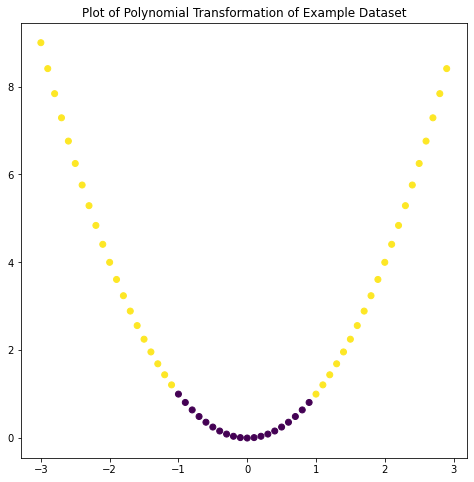

In [143]:
plt.figure(figsize=(8,8))
plt.scatter(np.arange(-3,3,0.1).reshape(-1,1) ,y_hat, c=example_y)
plt.title('Plot of Polynomial Transformation of Example Dataset')
plt.show

We can see that if we simply move this new curve down, we classify most of the examples correctly using the Binary Sign classifier. We'll do so by adjusting ${\bf{\theta}}$ so that the second degree polynomial term is moved down slightly by calculating:
$$
\begin{align}
\hat{y}=\phi(x) {\bf{\theta}}= \begin{bmatrix}
    1&x_{1} & x_{1}^2\\
    1&x_{2}& x_{2}^2\\
    \vdots & \vdots & \vdots \\
    1&x_{n}& x_{n}^2
\end{bmatrix}
\begin{bmatrix}
    -0.9\\
    0\\
    1
\end{bmatrix}=\begin{bmatrix}
     x_{1}^2-0.9\\
     x_{2}^2-0.9\\
    \vdots\\
     x_{n}^2
-0.9\end{bmatrix}
\end{align}
$$

<function matplotlib.pyplot.show>

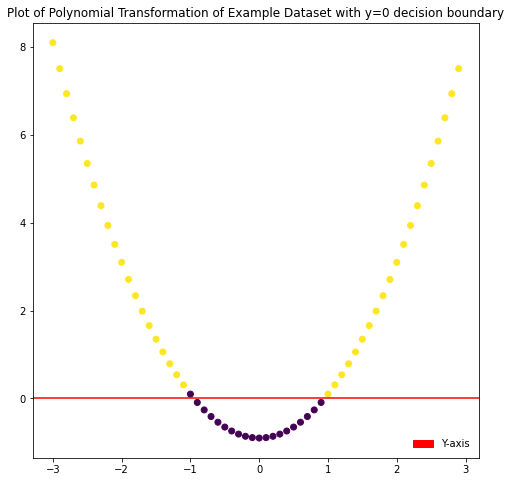

In [144]:
# Change the weight value
theta = np.array([-0.9,0,1])


# Compute y_hat
y_hat = np.matmul(example_X,theta)

# Plot
import matplotlib.patches as mpatches
plt.figure(figsize=(8,8))
arr1 = plt.scatter(np.arange(-3,3,0.1).reshape(-1,1) ,y_hat, c=example_y)
y_lim = plt.ylim()
x_lim = plt.xlim()
arr2 = plt.plot(x_lim, (0,0), 'k-', color = 'r')
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.legend([arr1, arr2], ['u','v'])
red_patch = mpatches.Patch(color='red', label='Y-axis',linestyle ='-')
plt.legend(handles=[red_patch],loc='lower right', frameon=False)
plt.title('Plot of Polynomial Transformation of Example Dataset with y=0 decision boundary')
plt.show

We can now see that if we were to classify the datapoints by the sign of $y_i$ that most of the data points would be correctly classified as those below the y-axis would be classified as 0 while the rest would be classified as 1.

### Second transformation example:
In addition to implementing a polynomial transformation and moving it up or down, we can also move the transformation right or left using a simple yet tricky transformation. Recall that a function $f(x)$ can be moved right $q$ units by computing $f(x-q)$ or to the left by $q$ computing $f(x+q)$. We can also move the polynomial transform left or right in a similar fashion by letting $\phi_j(x)=(x-q)^j$. Now we want to implement a right transform by choosing $q = 2$, carrying out a polynomial transforms, and shifting polynomial transforms down by 0.9. So to begin, we first want to transform the example_dataset into:

$$X =\begin{bmatrix}
    1&(x_{1}-2) & (x_{1}-2)^2\\
    1&(x_{2}-2)& (x_{2}-2)^2\\
    \vdots & \vdots & \vdots \\
    1&(x_{n}-2)& (x_{n}-2)^2
\end{bmatrix}$$
This should move our transformed value over to the right 2 units.

<function matplotlib.pyplot.show>

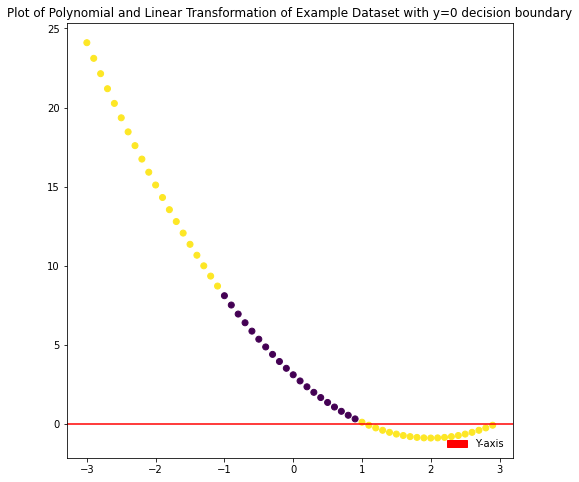

In [145]:
# First subtract 2 from each row in example_data
example_X = example_data-2

# Compute the 2nd degree polynomial transform
example_X = poly.fit_transform(example_X)

# Compute new y_hat with same theta as before
theta = np.array([-0.9,0, 1])
y_hat = np.matmul(example_X, theta)

# Plot
import matplotlib.patches as mpatches
plt.figure(figsize=(8,8))
arr1 = plt.scatter(np.arange(-3,3,0.1).reshape(-1,1) ,y_hat, c=example_y)
y_lim = plt.ylim()
x_lim = plt.xlim()
arr2 = plt.plot(x_lim, (0,0), 'k-', color = 'r')
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.legend([arr1, arr2], ['u','v'])
red_patch = mpatches.Patch(color='red', label='Y-axis',linestyle ='-')
plt.legend(handles=[red_patch],loc='lower right', frameon=False)
plt.title('Plot of Polynomial and Linear Transformation of Example Dataset with y=0 decision boundary')
plt.show

You can see that the parabola now begins at 2, rather than zero, and is shifted down.

## Binary Sign Classification on dataset from part (i)

### ii.a) How do you think a sign classification plus transformation model will perform on the Gaussian Quantile data?

#### YOUR ANSWER HERE
I think a sign classification and transformation will significantly help the model preform on the Gaussian Quantile data. This is a result of the data being mostly clustered in the middle of the dataset. Therefore we transform the dataset into a parabola like shape and slice in similar to the example above. 

### ii.b) Implementation
Now, you will implement a Binary Sign Classification model to transform the linear data from part (i) as well as implement the helper functions to compute $\hat{y}$, the class prediction, and the model accuracy. Then you will use the methods outlined above to transform the data into a new form for classification. For this example, we will just run our model on all of the data x and y.

In [146]:
# Implement these helper functions

def generate_h(y):
    """
    Generates the class prediction h[i]=1 if y[i]>0 or h[i]=0 if y[i]<0
    args:
        y: a numpy array of y values
    return: a (500,1) array of 1 and 0s indicating class prediction
    """
    h = y.copy()
    h[y > 0] = 1  #Stackoverflow helped me here
    h[y < 0] = 0 # h[i]=1 if y[i]>0 or h[i]=0 if y[i]<0 W
    
    return h


def compute_accuracy(y, h): 
    """
    computes the accuracy of the model. (h-y)/len(y)
    args:
        y: true class label
        h: predicted labels
    return: the accuracy.
    """
    return accuracy_score(y,h)  # function of sklearn.metrics found on https://scikit-learn.org/

In [147]:
# Impelement your data transformation using scikit learn polynomial
polynomial_degree = 2 # CHOOSE VALUE choose a degree for polynomial transformation
q = -3.1# CHOOSE VALUE choose a value for horizontal shift
poly = PolynomialFeatures(polynomial_degree)
X_tf = X.reshape(-1,1) # Don't change
X_tf = poly.fit_transform(X_tf-q)

In [148]:
# Compute y_hat
theta = np.array([-1.1,0,1]) #ADJUST THESE WEIGHTS. The length of w needs to be the same as the degree of polynomial+1,
# Either delete a poly-term or scale it, shift the transformed values up or down
y_hat = np.matmul(X_tf,theta) # Compute y_hat's
# Run sign model)

h = generate_h(y_hat)

accuracy = compute_accuracy(y,h)
print(f"accuracy= {accuracy}%")

accuracy= 0.88%


### Plotting data against y=0
The plotting function below may be helpful for visualizing the data against the decision boundary.

<function matplotlib.pyplot.show>

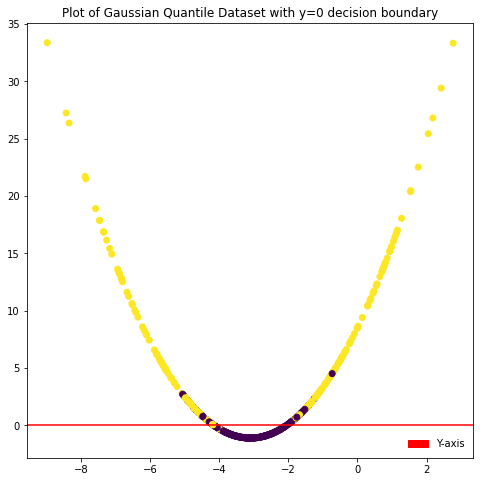

In [149]:
# Plot
import matplotlib.patches as mpatches
plt.figure(figsize=(8,8))
arr1 = plt.scatter(X ,y_hat, c=y)
y_lim = plt.ylim()
x_lim = plt.xlim()
arr2 = plt.plot(x_lim, (0,0), 'k-', color = 'r')
plt.ylim(y_lim)
plt.xlim(x_lim)
red_patch = mpatches.Patch(color='red', label='Y-axis',linestyle ='-')
plt.legend(handles=[red_patch],loc='lower right', frameon=False)
plt.title('Plot of Gaussian Quantile Dataset with y=0 decision boundary')
plt.show

### ii.c) How did we do?

Please comment on the performance of the model you created on classifying the dataset. What transformation parameters did you use? What was your ${\bf{\theta}}$?

#### YOUR ANSWER HERE
As expected, sign classifying and transforming the dataset help improve the accuracy of the model. I found that a second degree polynomial with theta = [-1.1,0,1] helps shape the model according. Then we must shift the data by setting parameter q = -3.1. The accuracy is able to reach 88% with these parameters. 

##iii) Artificial Neural Network
Next, we will use tensorflow to create an artificial neural network to classify the Gaussian Quantile dataset.

### iii.a) Build a Neural Network to feed in the Gaussian Quantile data

Below, define a neural network with the following layers:
<ul>
<li>Input Layer</li>
<li>Dense Layer with 15 neurons, choose whatever activation you think is suitable</li>
<li>Dense Layer with 5 neurons, choose whatever activation you think is suitable</li>
<li>Dense Layer with 1 neuron, choose whatever activation you think is suitable</li>
<li> Dense layer with 1 neuron for classification (what activation do we need to use?)</li>
</ul>

Then, run model.summary(), compile, then fit the model

In [150]:
from tensorflow.keras.layers import Input, Dense # Only use these layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import * 
from keras.callbacks import LearningRateScheduler

# BUILD NETWORK HERE

model = Sequential() 
model.add(Dense(units = 15 , input_dim=1, activation='tanh')) 
model.add(Dense(units = 5, activation='tanh')) 
model.add(Dense(units = 1, activation='sigmoid')) 
model.add(Dense(units = 1, activation='sigmoid')) 

In [151]:
# Show a summary of your model
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 15)                30        
_________________________________________________________________
dense_32 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 6         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 2         
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [152]:
# Compile your model with the chosen optimizer, binary cross entropy for the loss, and accuracy as the metric
#optimizer = Adamax()
optimizer = Adam(learning_rate=0.02) # SGD(lr=0.02, decay=1e-6, momentum=0.8)
model.compile(optimizer=optimizer,loss='bce',metrics=['accuracy'])

In [153]:
# Call fit on your model passing in the X, y data above, train for 100 epochs
hist = model.fit(X, y, epochs=200, validation_split=0.2 )

Epoch 1/200
13/13 [==============================] - 0s 10ms/step - loss: 0.6871 - accuracy: 0.5425 - val_loss: 0.6768 - val_accuracy: 0.6300
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6695 - accuracy: 0.6900 - val_loss: 0.6501 - val_accuracy: 0.6800
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6342 - accuracy: 0.7300 - val_loss: 0.6272 - val_accuracy: 0.6700
Epoch 4/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6073 - accuracy: 0.7375 - val_loss: 0.5972 - val_accuracy: 0.6800
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 0.5898 - accuracy: 0.7350 - val_loss: 0.5943 - val_accuracy: 0.6800
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 0.5723 - accuracy: 0.7375 - val_loss: 0.5943 - val_accuracy: 0.7000
Epoch 7/200
13/13 [==============================] - 0s 4ms/step - loss: 0.5686 - accuracy: 0.7275 - val_loss: 0.5726 - val_accuracy: 0.6900
Epoch 8/200


In [154]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

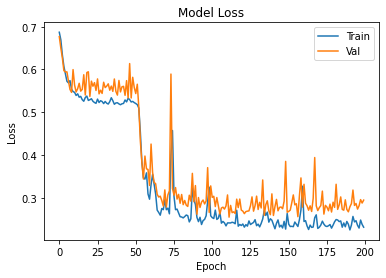

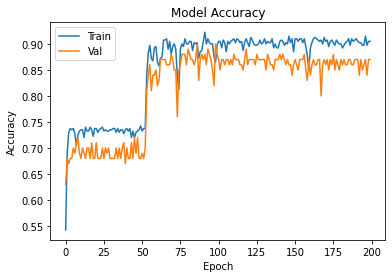

In [155]:
# plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)

###iii.a) How did the model perform.
How did your neural network preform? What hyperparameters and optimizer did you choose? Was the model able to outperform Logistic Regression? Outperform Binary Sign Classification? If it did, why do you think your neural network beat these other models? 

#### YOUR ANSWER 
The neural network preformed well and was able to predict the majority of data points. This resulted in the neural network outpreforming the Logistic Regression, however, the neural network hardly outpreformed the Binary Sign Classification (by ~1% on my trials). I suspect this is a result in the data pre-processing, or lack-thereof. The data clearly has some random points that do not fit well and should be omitted from the the dataset so the neural network most likely overfits the data. I also found that occasionally the neural network model will makes some mispredictions and result in an significantly lower accuracy (around 63%). This only happens occasionally but could potentially be a downside to using neural networks over Binary Sign Classification .

#2) Neural Network Classification
Next, we move on to using an artificial Neural Network for a task that is a bit harder. We will see if we can train our model to determine if patients with suffering from heart disease died during follow up treatment. The dataset has 299 samples with 12 features each and a target class:
<ul>
<li>age: age of the patient (years)</li>
<li>anaemia: decrease of red blood cells or hemoglobin (boolean)</li>
<li>high blood pressure: if the patient has hypertension (boolean)</li>
<li>creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)</li>
<li> diabetes: if the patient has diabetes (boolean)</li>
<li> ejection fraction: percentage of blood leaving the heart at each contraction (percentage)</li>
<li> platelets: platelets in the blood (kiloplatelets/mL)</li>
<li> sex: woman or man (binary)</li>
<li> serum creatinine: level of serum creatinine in the blood (mg/dL)</li>
<li> serum sodium: level of serum sodium in the blood (mEq/L)</li>
<li> smoking: if the patient smokes or not (boolean)</li>
<li> time: follow-up period (days)</li>
<li> [target] death event: if the patient deceased during the follow-up period (boolean)</li>
</ul>

In [156]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv

--2020-07-13 01:19:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12239 (12K) [application/x-httpd-php]
Saving to: ‘heart_failure_clinical_records_dataset.csv.3’

heart_failure_clini 100%[===================>]  11.95K  --.-KB/s    in 0s      

2020-07-13 01:19:20 (113 MB/s) - ‘heart_failure_clinical_records_dataset.csv.3’ saved [12239/12239]



## Data Loading and Preprocessing


In [157]:
# Read in the data
nn_dataframe = pd.read_csv('heart_failure_clinical_records_dataset.csv',sep=',')
nn_dataframe.dropna(inplace=True)

In [158]:
# Check data
nn_dataframe.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Split Data into X and y. Then scale the X data for model training

In [159]:
X = nn_dataframe.iloc[:, 0:12]
y = nn_dataframe.iloc[:,12]

In [160]:
# Check X data
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


###2.a) Use MinMaxScaler() to preprocess the dataset.
This is similar to standardization but will transform all the feature values to between 0 and 1. \\
**Hint: read information on MinMaxScaler (and other preprocessing transforms here):https://scikit-learn.org/stable/modules/preprocessing.html#normalization

In [161]:
from sklearn import preprocessing

X = X.values# Returns a numpy array
min_max_scaler =  preprocessing.MinMaxScaler()# YOUR CODE HERE define the MinMaxScaler object
X = min_max_scaler.fit_transform(X)# YOUR CODE HERE fit the MinMaxScaler

# Create numpy array of labels
y = y.values

###2.b) Implement an Artificial Neural network
Make a neural network to your liking. Define the input layer. Add Layers, specify the number of neurons in each layer, and the activation. and define the out layer.

In [162]:
# BUILD NETWORK HERE
def build_model2(): 
  model = Sequential() 
  model.add(Dense(units = 12, input_dim=12, activation='tanh')) 
  model.add(Dense(units = 24, input_dim=12, activation='tanh'))
  model.add(Dense(units = 36, activation='tanh'))  
  model.add(Dense(units = 1, activation='sigmoid')) 
  return model

In [163]:
# Show a summary of your model
model = build_model2()
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_36 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_37 (Dense)             (None, 36)                900       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 37        
Total params: 1,405
Trainable params: 1,405
Non-trainable params: 0
_________________________________________________________________


In [164]:
# Compile your model with the chosen optimizer, binary cross entropy for the loss, and accuracy as the metric
optimizer = Adam(learning_rate=0.1, beta_1=1, beta_2=1 , epsilon=1e-06)
model.compile(optimizer=optimizer,loss='bce',metrics=['accuracy'])

In [165]:
# Call fit on your model passing in the X, y data above, train for 100 epochs
hist = model.fit(X, y, epochs=1000, validation_split=0.2)

Epoch 1/1000
8/8 [==============================] - 0s 16ms/step - loss: nan - accuracy: 0.5941 - val_loss: nan - val_accuracy: 0.9500
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.6109 - val_loss: nan - val_accuracy: 0.9500
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6109 - val_loss: nan - val_accuracy: 0.9500
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6109 - val_loss: nan - val_accuracy: 0.9500
Epoch 5/1000
8/8 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6109 - val_loss: nan - val_accuracy: 0.9500
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6109 - val_loss: nan - val_accuracy: 0.9500
Epoch 7/1000
8/8 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6109 - val_loss: nan - val_accuracy: 0.9500
Epoch 8/1000
8/8 [==============================] - 0s 6ms/st

###2.c) How did the model perform.
How did your neural network preform? What hyperparameters and optimizer did you choose? What activation did you use?

#### YOUR ANSWER HERE
My neural netwrk was able to gain significant accuracy with the Gaussian Data Structure. After playing arund and experimenting with different types and size models, I chose t stick with the Adam optimizer with learning_rate, Beta, and epsilon changed slightly from the default values. I also found that increasing the number of epoches caused my model to overfit the data, after I found this flaw I decreased the depth of the network and the overfitting went away. I made the most significant advantage to the network by adding neurons to the first 3 levels of the network. Finally, Tanh proved to be a valuable activation function for the first three depths of the network while I chose to use the Signmoid activation function for the final layer. 